### Import Libraries

In [143]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from pandas_profiling import ProfileReport
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,roc_curve
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

# Problem 1- Linear Regresion

You are hired by a company Gem Stones co ltd, which is a cubic zirconia manufacturer. You are provided with the dataset containing the prices and other attributes of almost 27,000 cubic zirconia (which is an inexpensive diamond alternative with many of the same qualities as a diamond). The company is earning different profits on different prize slots. You have to help the company in predicting the price for the stone on the bases of the details given in the dataset so it can distinguish between higher profitable stones and lower profitable stones so as to have better profit share. Also, provide them with the best 5 attributes that are most important.

### 1.1. Read the data and do exploratory data analysis. Describe the data briefly. (Check the null values, Data types, shape, EDA, duplicate values). Perform Univariate and Bivariate Analysis.

In [144]:
df=pd.read_csv('cubic_zirconia.csv')

In [145]:
df.head()

Unnamed: 0  carat        cut color clarity  depth  table     x     y     z  \
0           1   0.30      Ideal     E     SI1   62.1   58.0  4.27  4.29  2.66   
1           2   0.33    Premium     G      IF   60.8   58.0  4.42  4.46  2.70   
2           3   0.90  Very Good     E    VVS2   62.2   60.0  6.04  6.12  3.78   
3           4   0.42      Ideal     F     VS1   61.6   56.0  4.82  4.80  2.96   
4           5   0.31      Ideal     F    VVS1   60.4   59.0  4.35  4.43  2.65   

   price  
0    499  
1    984  
2   6289  
3   1082  
4    779

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26967 non-null  int64  
 1   carat       26967 non-null  float64
 2   cut         26967 non-null  object 
 3   color       26967 non-null  object 
 4   clarity     26967 non-null  object 
 5   depth       26270 non-null  float64
 6   table       26967 non-null  float64
 7   x           26967 non-null  float64
 8   y           26967 non-null  float64
 9   z           26967 non-null  float64
 10  price       26967 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.3+ MB


### Drop Unnamed variable

In [147]:
df.drop('Unnamed: 0',axis=1,inplace=True)

### Drop duplicates 

In [148]:
df.duplicated().any()

True

In [149]:
df.drop_duplicates(inplace=True)

### Univariate Analysis

### Numerical values

In [150]:
def univariateAnalysis_numeric(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(df[column].describe(),end=' ')
    print("Skewness: %f" % df[column].skew())
    
    
    plt.figure()
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    sns.distplot(df[column], kde=False, color='g');
    plt.show()
    
    plt.figure()
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=df[column])
    plt.show()

In [151]:
df_num = df.select_dtypes(include = ['float64','int64'])
numericcolumns = list(df_num.columns.values)
len(numericcolumns)

7

In [152]:
numericcolumns

['carat', 'depth', 'table', 'x', 'y', 'z', 'price']

Description of carat
----------------------------------------------------------------------------
count    26933.000000
mean         0.798010
std          0.477237
min          0.200000
25%          0.400000
50%          0.700000
75%          1.050000
max          4.500000
Name: carat, dtype: float64 Skewness: 1.114789
Distribution of carat
----------------------------------------------------------------------------


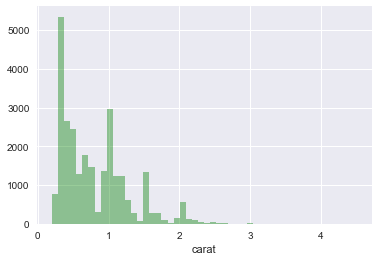

BoxPlot of carat
----------------------------------------------------------------------------


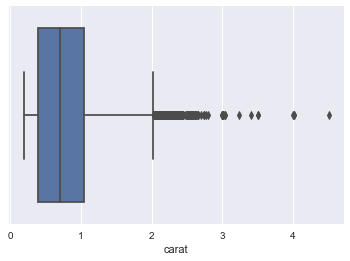

Description of depth
----------------------------------------------------------------------------
count    26236.000000
mean        61.745285
std          1.412243
min         50.800000
25%         61.000000
50%         61.800000
75%         62.500000
max         73.600000
Name: depth, dtype: float64 Skewness: -0.026086
Distribution of depth
----------------------------------------------------------------------------


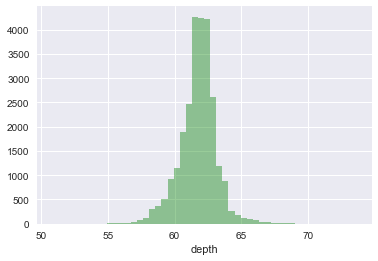

BoxPlot of depth
----------------------------------------------------------------------------


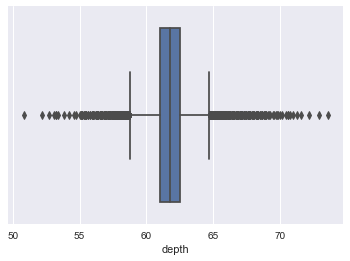

Description of table
----------------------------------------------------------------------------
count    26933.000000
mean        57.455950
std          2.232156
min         49.000000
25%         56.000000
50%         57.000000
75%         59.000000
max         79.000000
Name: table, dtype: float64 Skewness: 0.765805
Distribution of table
----------------------------------------------------------------------------


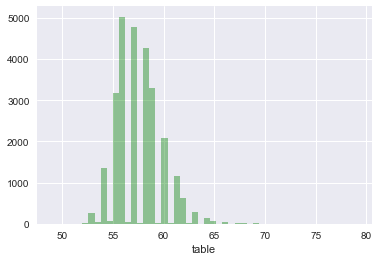

BoxPlot of table
----------------------------------------------------------------------------


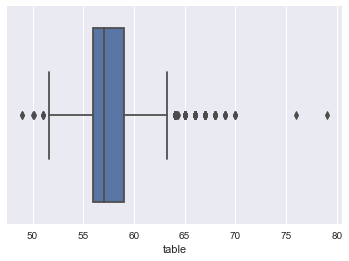

Description of x
----------------------------------------------------------------------------
count    26933.000000
mean         5.729346
std          1.127367
min          0.000000
25%          4.710000
50%          5.690000
75%          6.550000
max         10.230000
Name: x, dtype: float64 Skewness: 0.392290
Distribution of x
----------------------------------------------------------------------------


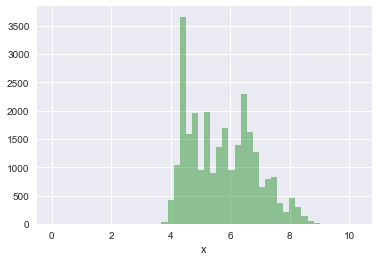

BoxPlot of x
----------------------------------------------------------------------------


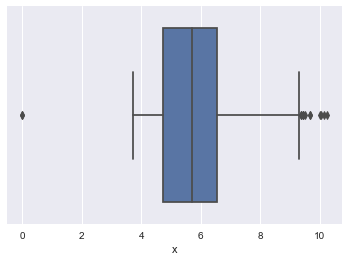

Description of y
----------------------------------------------------------------------------
count    26933.000000
mean         5.733102
std          1.165037
min          0.000000
25%          4.710000
50%          5.700000
75%          6.540000
max         58.900000
Name: y, dtype: float64 Skewness: 3.867764
Distribution of y
----------------------------------------------------------------------------


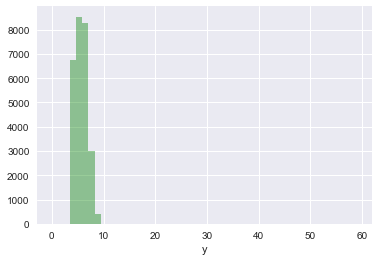

BoxPlot of y
----------------------------------------------------------------------------


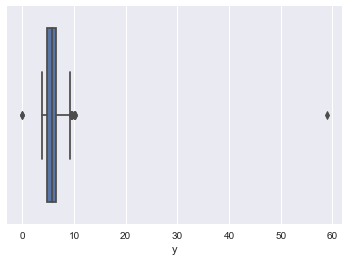

Description of z
----------------------------------------------------------------------------
count    26933.000000
mean         3.537769
std          0.719964
min          0.000000
25%          2.900000
50%          3.520000
75%          4.040000
max         31.800000
Name: z, dtype: float64 Skewness: 2.580665
Distribution of z
----------------------------------------------------------------------------


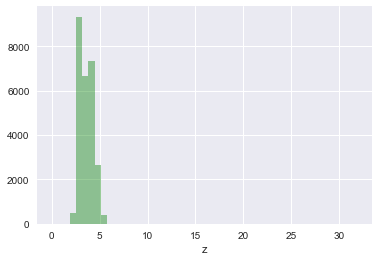

BoxPlot of z
----------------------------------------------------------------------------


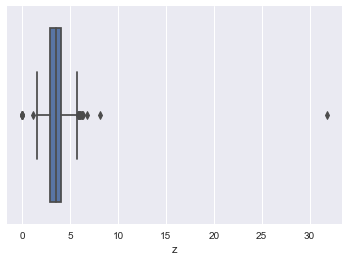

Description of price
----------------------------------------------------------------------------
count    26933.000000
mean      3937.526120
std       4022.551862
min        326.000000
25%        945.000000
50%       2375.000000
75%       5356.000000
max      18818.000000
Name: price, dtype: float64 Skewness: 1.619116
Distribution of price
----------------------------------------------------------------------------


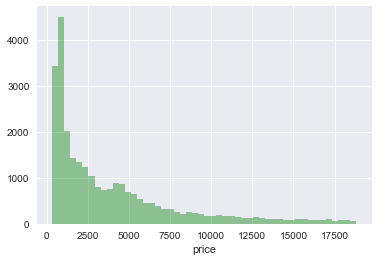

BoxPlot of price
----------------------------------------------------------------------------


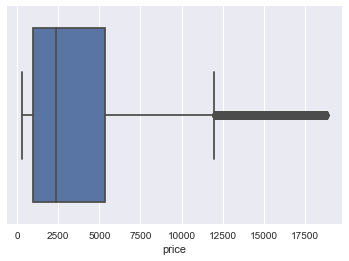

In [153]:
for x in numericcolumns:
    univariateAnalysis_numeric(x,20)

### Categorical Variables

<AxesSubplot:xlabel='cut', ylabel='count'>

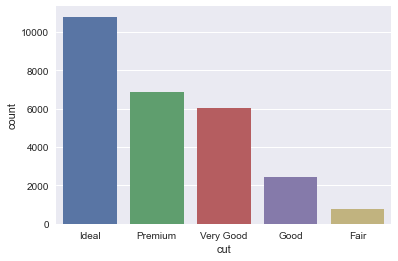

In [154]:
sns.countplot(x ='cut', data = df)

In [155]:
sns.countplot(x ='color', data = df)

<AxesSubplot:xlabel='color', ylabel='count'>

<AxesSubplot:xlabel='clarity', ylabel='count'>

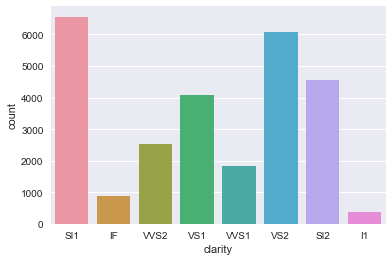

In [156]:
sns.countplot(x ='clarity', data = df)

### Bivariate Analysis

In [157]:
px.pie(df,values="price",names="cut",title='Distribution of Cut vs price',color_discrete_sequence=px.colors.qualitative.Antique)

In [158]:
px.pie(df,values="price",names="clarity",title='Distribution of Clarity vs price',color_discrete_sequence=px.colors.qualitative.Alphabet)

In [159]:
px.pie(df,values="price",names="color",title='Distribution of Color vs price',color_discrete_sequence=px.colors.qualitative.Set2)

### Multivariate analysis

### Pairplot

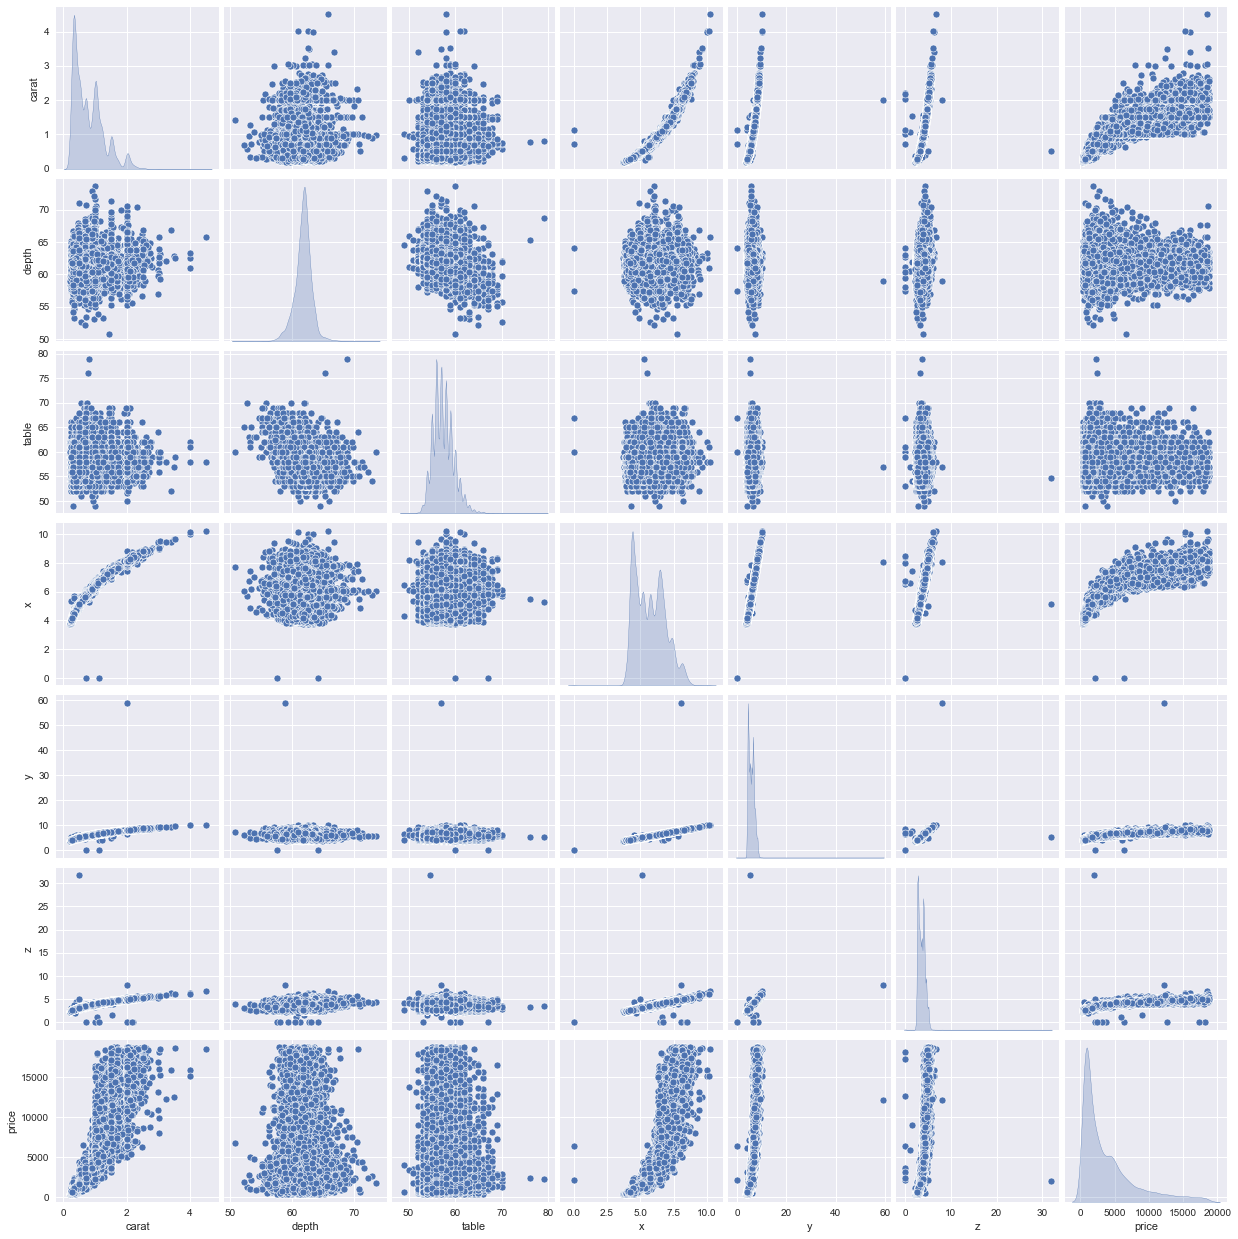

In [160]:
cont=df.dtypes[(df.dtypes!='object')].index
df_attr = (df[cont])
sns.pairplot(df_attr, diag_kind='kde')  

### Correlation Plot

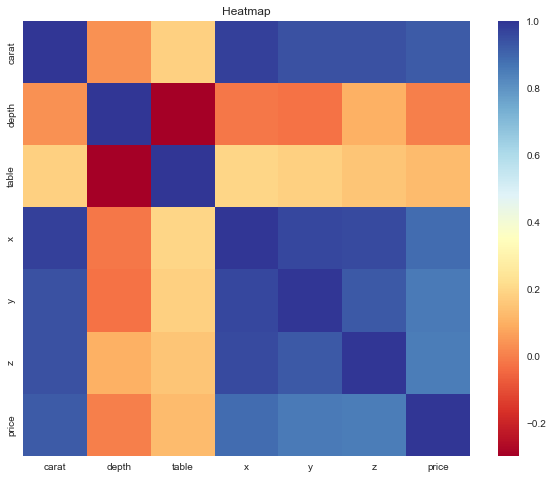

In [161]:
plt.figure(figsize = (10,8))
sns.heatmap(data = df.corr(), cmap = 'RdYlBu')
plt.title('Heatmap')
plt.show()

### Box Plot

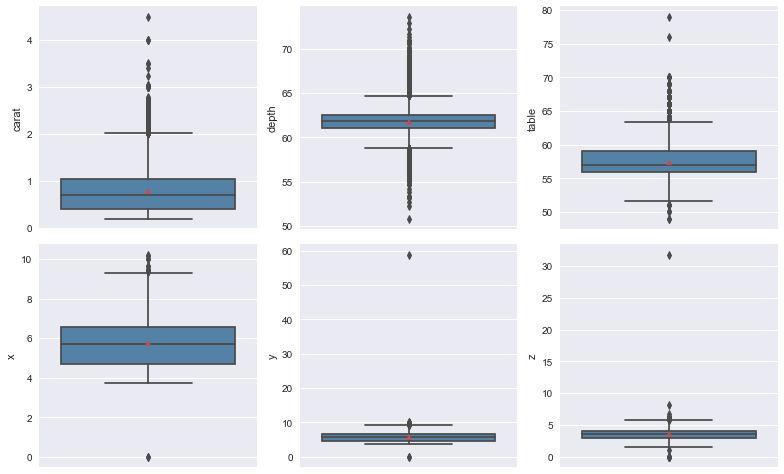

In [162]:
# construct box plot for continuous variables
num_cols = df[['carat','depth','table','x','y','z']]
plt.figure(figsize = (11,10))
plt.style.use('seaborn')
for i,col in enumerate(num_cols):
    plt.subplot(3,3,i+1)
    sns.boxplot( y = col, data = df, 
                color = 'steelblue',
                showmeans = True)
    plt.tight_layout()

In [163]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [164]:
for column in num_cols.columns:
    lr,ur=remove_outlier(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])

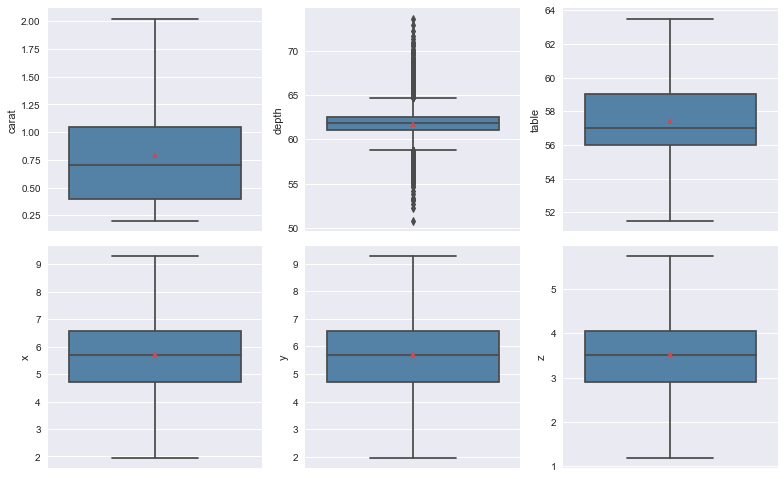

In [165]:
plt.figure(figsize = (11,10))
plt.style.use('seaborn')
for i,col in enumerate(num_cols):
    plt.subplot(3,3,i+1)
    sns.boxplot( y = col, data = df, 
                color = 'steelblue',
                showmeans = True)
    plt.tight_layout()

### 1.2 Impute null values if present, also check for the values which are equal to zero. Do they have any meaning or do we need to change them or drop them? Check for the possibility of combining the sub levels of a ordinal variables and take actions accordingly. Explain why you are combining these sub levels with appropriate reasoning.¶

In [166]:
df.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [167]:
for column in df.columns:
    if df[column].dtype != 'object':
        median = df[column].median()
        df[column] = df[column].fillna(median)    
        
df.isnull().sum()  

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [168]:
for column in num_cols.columns:
    lr,ur=remove_outlier(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])

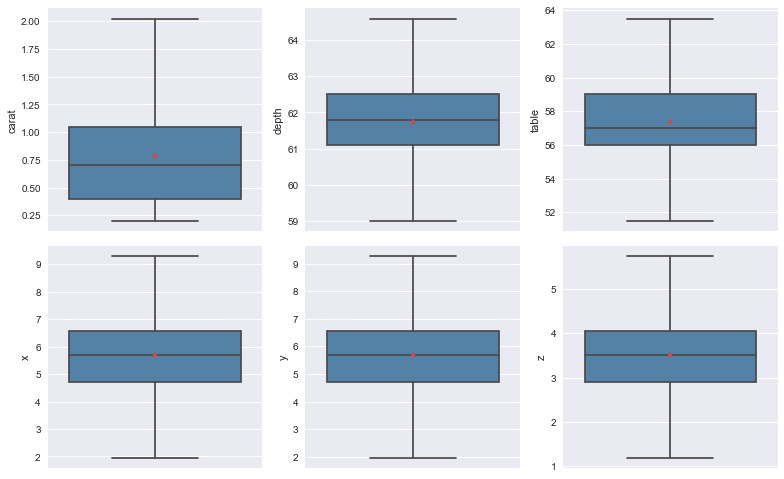

In [169]:
plt.figure(figsize = (11,10))
plt.style.use('seaborn')
for i,col in enumerate(num_cols):
    plt.subplot(3,3,i+1)
    sns.boxplot( y = col, data = df, 
                color = 'steelblue',
                showmeans = True)
    plt.tight_layout()

In [170]:
df.loc[((df['x']==0)| (df['y']==0)|(df['z']==0))]

Empty DataFrame
Columns: [carat, cut, color, clarity, depth, table, x, y, z, price]
Index: []

In [171]:
df.drop(df[((df['x']==0)| (df['y']==0)|(df['z']==0))].index,inplace=True)

### 1.3 Encode the data (having string values) for Modelling. Split the data into train and test (70:30). Apply Linear regression using scikit learn. Perform checks for significant variables using appropriate method from statsmodel. Create multiple models and check the performance of Predictions on Train and Test sets using Rsquare, RMSE & Adj Rsquare. Compare these models and select the best one with appropriate reasoning

In [172]:
cut_dict = {'Fair':1, 
            'Good':2, 
            'Very Good':3, 
            'Premium':4, 
            'Ideal':5, 
        }
# apply using map
df['cut'] = df.cut.map(cut_dict)

In [173]:
color_dict = {
    'J':7, 
    'I':6, 
    'H':5, 
    'G':4, 
    'F':3,
    'E':2,
    'D':1
        }
# apply using map
df['color'] = df.color.map(color_dict)

In [174]:
clarity_dict = {
    'IF': 1, 
    'VVS1':2, 
    'VVS2':3, 
    'VS1':4, 
    'VS2':5,
    'SI1':6,
    'SI2':7,
    'I1':8
        }
# apply using map
df['clarity'] = df.clarity.map(clarity_dict)

In [175]:
df

carat  cut  color  clarity  depth  table     x     y     z  price
0       0.30    4      2        6   62.1   58.0  4.27  4.29  2.66    499
1       0.33    4      4        1   60.8   58.0  4.42  4.46  2.70    984
2       0.90    3      2        3   62.2   60.0  6.04  6.12  3.78   6289
3       0.42    4      3        4   61.6   56.0  4.82  4.80  2.96   1082
4       0.31    4      3        2   60.4   59.0  4.35  4.43  2.65    779
...      ...  ...    ...      ...    ...    ...   ...   ...   ...    ...
26962   1.11    4      4        6   62.3   58.0  6.61  6.52  4.09   5408
26963   0.33    4      5        1   61.9   55.0  4.44  4.42  2.74   1114
26964   0.51    4      2        5   61.7   58.0  5.12  5.15  3.17   1656
26965   0.27    3      3        3   61.8   56.0  4.19  4.20  2.60    682
26966   1.25    4      7        6   62.0   58.0  6.90  6.88  4.27   5166

[26933 rows x 10 columns]

In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26933 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26933 non-null  float64
 1   cut      26933 non-null  int64  
 2   color    26933 non-null  int64  
 3   clarity  26933 non-null  int64  
 4   depth    26933 non-null  float64
 5   table    26933 non-null  float64
 6   x        26933 non-null  float64
 7   y        26933 non-null  float64
 8   z        26933 non-null  float64
 9   price    26933 non-null  int64  
dtypes: float64(6), int64(4)
memory usage: 3.3 MB


In [177]:
df.isnull().values.any()

False

In [178]:
# Copy all the predictor variables into X dataframe
X = df.drop('price', axis=1)

# Copy target into the y dataframe. 
y = df[['price']]

In [179]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , train_size=0.7,random_state=1)

## Linear Regression Model

In [180]:
# invoke the LinearRegression function and find the bestfit model on training data

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [181]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for carat is 13508.51050301242
The coefficient for cut is 207.5681773045594
The coefficient for color is -333.8031115830895
The coefficient for clarity is -486.435670507871
The coefficient for depth is -41.108691599504006
The coefficient for table is -35.01168817368915
The coefficient for x is -2736.746338064951
The coefficient for y is 1460.6024867215933
The coefficient for z is -915.141101272535


In [182]:
# Let us check the intercept for the model

intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 11199.461850284808


In [183]:
# R square on training data
regression_model.score(X_train, y_train)

0.9162709230382104

In [184]:
# R square on testing data
regression_model.score(X_test, y_test)

0.9182765496587066

In [185]:
#RMSE on Training data
predicted_train=regression_model.fit(X_train, y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

1160.175719507491

In [186]:
#RMSE on Testing data
predicted_test=regression_model.fit(X_train, y_train).predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

1158.552701229997

## Linear Regression using statsmodels

In [187]:
# concatenate X and y into a single dataframe
data_train = pd.concat([X_train, y_train], axis=1)
data_test=pd.concat([X_test,y_test],axis=1)
data_train.head()

carat  cut  color  clarity  depth  table     x     y     z  price
22114   0.34    3      5        5   62.4   60.0  4.41  4.44  2.76    537
2275    0.30    4      2        5   61.2   55.0  4.35  4.31  2.65    844
19183   0.50    4      4        6   62.5   57.0  5.09  5.05  3.17   1240
5030    1.10    2      2        7   63.3   56.0  6.53  6.58  4.15   4065
25414   1.02    4      3        7   61.1   62.0  6.54  6.49  3.98   4057

In [188]:
data_train.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z',
       'price'],
      dtype='object')

In [189]:
expr='price~carat+cut+color+clarity+depth+table+x+y+z'

In [190]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= expr, data = data_train).fit()
lm1.params

Intercept    11199.461850
carat        13508.510503
cut            207.568177
color         -333.803112
clarity       -486.435671
depth          -41.108692
table          -35.011688
x            -2736.746338
y             1460.602487
z             -915.141101
dtype: float64

In [191]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                 2.291e+04
Date:                Sun, 08 May 2022   Prob (F-statistic):               0.00
Time:                        16:22:24   Log-Likelihood:            -1.5978e+05
No. Observations:               18853   AIC:                         3.196e+05
Df Residuals:                   18843   BIC:                         3.197e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    1.12e+04    885.544     12.647      0.0

In [192]:
# Calculate MSE
mse = np.mean((lm1.predict(data_train.drop('price',axis=1))-data_train['price'])**2)

In [193]:
#Root Mean Squared Error - RMSE
np.sqrt(mse)

1160.1757195074929

In [194]:
np.sqrt(lm1.mse_resid) #another way

1160.4835319136155

In [195]:
# Prediction on Test data
y_pred = lm1.predict(data_test)

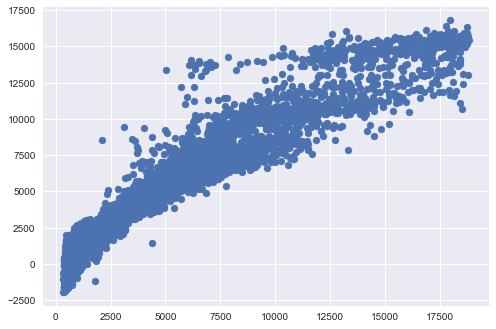

In [196]:
plt.scatter(y_test['price'], y_pred)
plt.show()

### Linear Regression with Scaling the data

In [197]:
from scipy.stats import zscore

X_train_scaled  = X_train.apply(zscore)
X_test_scaled = X_test.apply(zscore)
y_train_scaled = y_train.apply(zscore)
y_test_scaled = y_test.apply(zscore)

In [198]:
# invoke the LinearRegression function and find the bestfit model on training data

regression_model = LinearRegression()
regression_model.fit(X_train_scaled, y_train_scaled)

LinearRegression()

In [199]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for carat is 1.5502135803681054
The coefficient for cut is 0.03991902083192056
The coefficient for color is -0.14184062818012996
The coefficient for clarity is -0.1999693185007817
The coefficient for depth is -0.012408845565690881
The coefficient for table is -0.018805948536158253
The coefficient for x is -0.7659409247179034
The coefficient for y is 0.40595313321787396
The coefficient for z is -0.1584707590599001


In [200]:
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -2.387029961001798e-16


In [201]:
# Model score - R2 or coeff of determinant
# R^2=1–RSS / TSS

regression_model.score(X_test_scaled, y_test_scaled)

0.9181739896317118

In [202]:
# Let us check the sum of squared errors by predicting value of y for training cases and 
# subtracting from the actual y for the training cases

mse = np.mean((regression_model.predict(X_test_scaled)-y_test_scaled)**2)

In [203]:
# underroot of mean_sq_error is standard deviation i.e. avg variance between predicted and actual

import math

math.sqrt(mse)

0.2860524608673872

In [204]:
# predict mileage (mpg) for a set of attributes not in the training or test set
y_pred = regression_model.predict(X_test_scaled)

In [205]:
# Since this is regression, plot the predicted y value vs actual y values for the test data
# A good model's prediction will be close to actual leading to high R and R2 values
plt.scatter(y_test_scaled['price'], y_pred)

In [206]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [207]:
vif = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])] 

In [208]:
i=0
for column in X.columns:
    if i < 11:
        print (column ,"--->",  vif[i])
        i = i+1


carat ---> 112.46808582406392
cut ---> 23.823283178373607
color ---> 6.12219229243825
clarity ---> 12.308648943384748
depth ---> 894.7937362119162
table ---> 682.5082684376415
x ---> 10431.453371488135
y ---> 9288.504508410599
z ---> 1959.2895001296856


# Problem-2 Linear Discriminant Analysis

You are hired by a tour and travel agency which deals in selling holiday packages. You are provided details of 872 employees of a company. Among these employees, some opted for the package and some didn't. You have to help the company in predicting whether an employee will opt for the package or not on the basis of the information given in the data set. Also, find out the important factors on the basis of which the company will focus on particular employees to sell their packages.

### 2.1 Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, write an inference on it. Perform Univariate and Bivariate Analysis. Do exploratory data analysis.

In [75]:
cf=pd.read_csv('Holiday_Package.csv')

In [76]:
cf.head()

Unnamed: 0 Holliday_Package  Salary  age  educ  no_young_children  \
0           1               no   48412   30     8                  1   
1           2              yes   37207   45     8                  0   
2           3               no   58022   46     9                  0   
3           4               no   66503   31    11                  2   
4           5               no   66734   44    12                  0   

   no_older_children foreign  
0                  1      no  
1                  1      no  
2                  0      no  
3                  0      no  
4                  2      no

### Drop Unidentified variable

In [77]:
cf.drop('Unnamed: 0',axis=1,inplace=True)

In [78]:
cf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Holliday_Package   872 non-null    object
 1   Salary             872 non-null    int64 
 2   age                872 non-null    int64 
 3   educ               872 non-null    int64 
 4   no_young_children  872 non-null    int64 
 5   no_older_children  872 non-null    int64 
 6   foreign            872 non-null    object
dtypes: int64(5), object(2)
memory usage: 47.8+ KB


In [79]:
cf.shape

(872, 7)

### Check for duplicates

In [80]:
cf.duplicated().any()

False

### Check for missing values

In [81]:
cf.isnull().values.any()

False

### Descriptive Statistics

In [82]:
cf.describe(include='all')

Holliday_Package         Salary         age        educ  \
count               872     872.000000  872.000000  872.000000   
unique                2            NaN         NaN         NaN   
top                  no            NaN         NaN         NaN   
freq                471            NaN         NaN         NaN   
mean                NaN   47729.172018   39.955275    9.307339   
std                 NaN   23418.668531   10.551675    3.036259   
min                 NaN    1322.000000   20.000000    1.000000   
25%                 NaN   35324.000000   32.000000    8.000000   
50%                 NaN   41903.500000   39.000000    9.000000   
75%                 NaN   53469.500000   48.000000   12.000000   
max                 NaN  236961.000000   62.000000   21.000000   

        no_young_children  no_older_children foreign  
count          872.000000         872.000000     872  
unique                NaN                NaN       2  
top                   NaN                NaN      no  
freq                  NaN                NaN     656  
mean             0.311927           0.982798     NaN  
std              0.612870           1.086786     NaN  
min              0.000000           0.000000     NaN  
25%              0.000000           0.000000     NaN  
50%              0.000000           1.000000     NaN  
75%              0.000000           2.000000     NaN  
max              3.000000           6.000000     NaN

## Univariate Analysis

### Numerical Variable

In [83]:
def univariateAnalysis_numeric(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(cf[column].describe(),end=' ')
    print("Skewness: %f" % cf[column].skew())
    
    
    plt.figure()
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    sns.distplot(cf[column], kde=False, color='g');
    plt.show()
    
    plt.figure()
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=cf[column])
    plt.show()

In [84]:
cf_num = cf.select_dtypes(include = ['int64'])
num_columns = list(cf_num.columns.values)
len(num_columns)

5

In [85]:
num_columns

['Salary', 'age', 'educ', 'no_young_children', 'no_older_children']

Description of Salary
----------------------------------------------------------------------------
count       872.000000
mean      47729.172018
std       23418.668531
min        1322.000000
25%       35324.000000
50%       41903.500000
75%       53469.500000
max      236961.000000
Name: Salary, dtype: float64 Skewness: 3.103216
Distribution of Salary
----------------------------------------------------------------------------


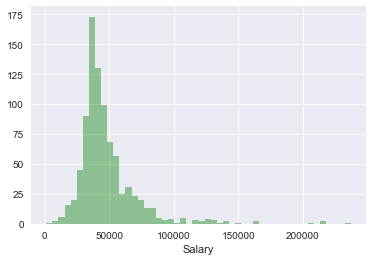

BoxPlot of Salary
----------------------------------------------------------------------------


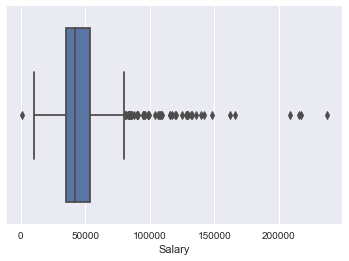

Description of age
----------------------------------------------------------------------------
count    872.000000
mean      39.955275
std       10.551675
min       20.000000
25%       32.000000
50%       39.000000
75%       48.000000
max       62.000000
Name: age, dtype: float64 Skewness: 0.146412
Distribution of age
----------------------------------------------------------------------------


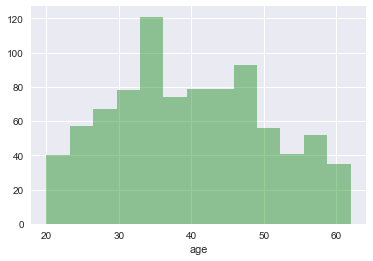

BoxPlot of age
----------------------------------------------------------------------------


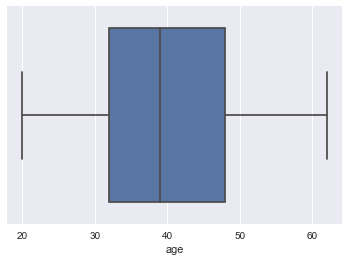

Description of educ
----------------------------------------------------------------------------
count    872.000000
mean       9.307339
std        3.036259
min        1.000000
25%        8.000000
50%        9.000000
75%       12.000000
max       21.000000
Name: educ, dtype: float64 Skewness: -0.045501
Distribution of educ
----------------------------------------------------------------------------


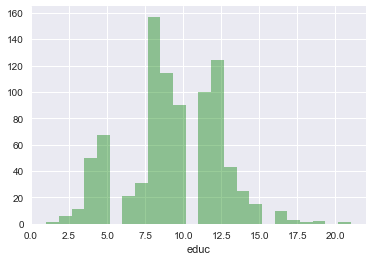

BoxPlot of educ
----------------------------------------------------------------------------


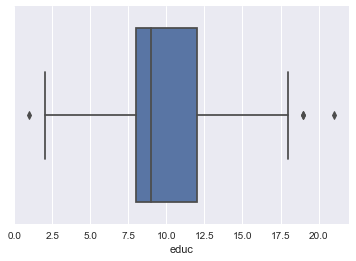

Description of no_young_children
----------------------------------------------------------------------------
count    872.000000
mean       0.311927
std        0.612870
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: no_young_children, dtype: float64 Skewness: 1.946515
Distribution of no_young_children
----------------------------------------------------------------------------


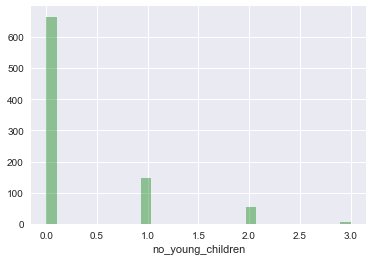

BoxPlot of no_young_children
----------------------------------------------------------------------------


Description of no_older_children
----------------------------------------------------------------------------
count    872.000000
mean       0.982798
std        1.086786
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        6.000000
Name: no_older_children, dtype: float64 Skewness: 0.953951
Distribution of no_older_children
----------------------------------------------------------------------------


BoxPlot of no_older_children
----------------------------------------------------------------------------


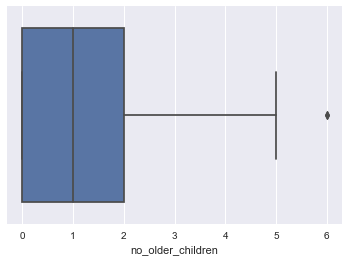

In [86]:
for x in num_columns:
    univariateAnalysis_numeric(x,20)

## Categorical Variable

<AxesSubplot:xlabel='Holliday_Package', ylabel='count'>

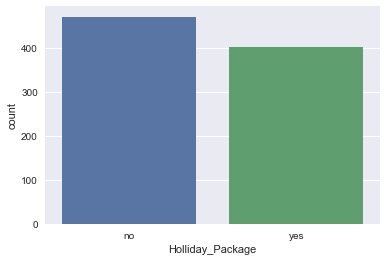

In [87]:
sns.countplot(x ='Holliday_Package', data = cf)

In [88]:
sns.countplot(x ='foreign', data = cf)

<AxesSubplot:xlabel='foreign', ylabel='count'>

### Bivariate Analysis

In [89]:
sns.barplot(x ='Holliday_Package', y ='Salary', data = cf, palette ='plasma')

<AxesSubplot:xlabel='Holliday_Package', ylabel='Salary'>

In [90]:
sns.barplot(x ='Holliday_Package', y ='age', data = cf, palette ='plasma')

<AxesSubplot:xlabel='Holliday_Package', ylabel='age'>

In [91]:
sns.barplot(x ='Holliday_Package', y ='educ', data = cf, palette ='plasma')

<AxesSubplot:xlabel='Holliday_Package', ylabel='educ'>

<AxesSubplot:xlabel='Holliday_Package', ylabel='no_young_children'>

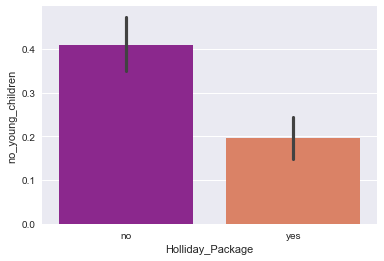

In [92]:
sns.barplot(x ='Holliday_Package', y ='no_young_children', data = cf, palette ='plasma')

In [93]:
sns.barplot(x ='Holliday_Package', y ='no_older_children', data = cf, palette ='plasma')

<AxesSubplot:xlabel='Holliday_Package', ylabel='no_older_children'>

In [94]:
sns.histplot(binwidth=0.5, x="Holliday_Package", hue="foreign", data=cf, stat="count", multiple="stack")

<AxesSubplot:xlabel='Holliday_Package', ylabel='Count'>

### Multivariate Analysis

### Pair Plot

In [95]:
cont=cf.dtypes[(cf.dtypes!='object')].index
cf_attr = (cf[cont])
sns.pairplot(cf_attr, diag_kind='kde')

### Correlation Plot

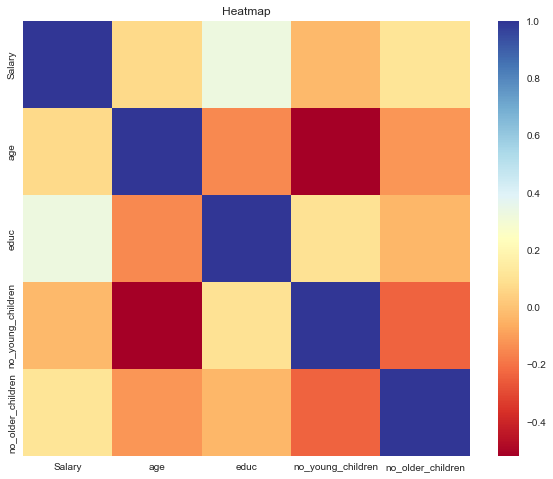

In [96]:
plt.figure(figsize = (10,8))
sns.heatmap(data = cf.corr(), cmap = 'RdYlBu')
plt.title('Heatmap')
plt.show()

### Box Plot

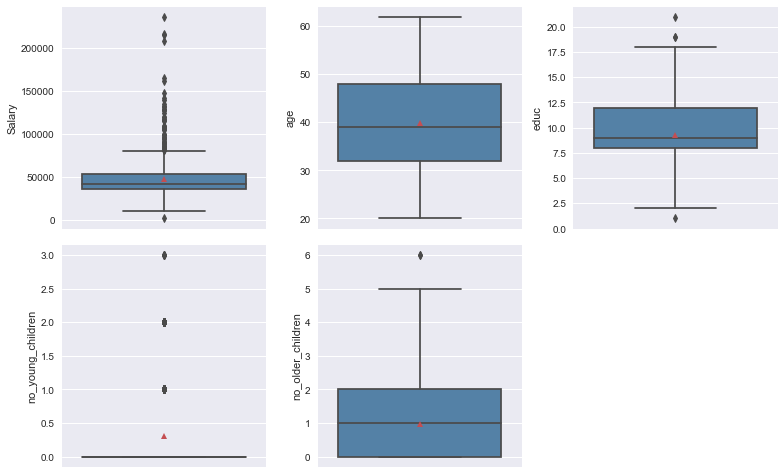

In [97]:
# construct box plot for continuous variables
num_col = cf[['Salary', 'age', 'educ', 'no_young_children', 'no_older_children']]
plt.figure(figsize = (11,10))
plt.style.use('seaborn')
for i,col in enumerate(num_col):
    plt.subplot(3,3,i+1)
    sns.boxplot( y = col, data = cf, 
                color = 'steelblue',
                showmeans = True)
    plt.tight_layout()

In [98]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [99]:
for column in num_col.columns:
    lr,ur=remove_outlier(cf[column])
    cf[column]=np.where(cf[column]>ur,ur,cf[column])
    cf[column]=np.where(cf[column]<lr,lr,cf[column])

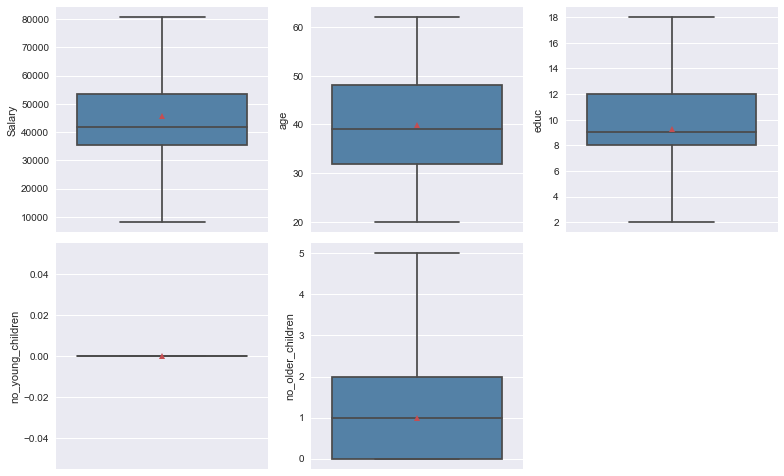

In [100]:
plt.figure(figsize = (11,10))
plt.style.use('seaborn')
for i,col in enumerate(num_col):
    plt.subplot(3,3,i+1)
    sns.boxplot( y = col, data = cf, 
                color = 'steelblue',
                showmeans = True)
    plt.tight_layout()

### 2.2 Do not scale the data. Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Logistic Regression and LDA (linear discriminant analysis).

In [101]:
cf.head()

Holliday_Package   Salary   age  educ  no_young_children  no_older_children  \
0               no  48412.0  30.0   8.0                0.0                1.0   
1              yes  37207.0  45.0   8.0                0.0                1.0   
2               no  58022.0  46.0   9.0                0.0                0.0   
3               no  66503.0  31.0  11.0                0.0                0.0   
4               no  66734.0  44.0  12.0                0.0                2.0   

  foreign  
0      no  
1      no  
2      no  
3      no  
4      no

### Encode the categorical variables

In [102]:
dict1 = {'yes':1,'no':0}
# apply using map
cf['foreign'] = cf.foreign.map(dict1)

In [103]:
dict = {'yes':1,'no':0}
# apply using map
cf['Holliday_Package'] = cf.Holliday_Package.map(dict)

In [104]:
cf.head()

Holliday_Package   Salary   age  educ  no_young_children  \
0                 0  48412.0  30.0   8.0                0.0   
1                 1  37207.0  45.0   8.0                0.0   
2                 0  58022.0  46.0   9.0                0.0   
3                 0  66503.0  31.0  11.0                0.0   
4                 0  66734.0  44.0  12.0                0.0   

   no_older_children  foreign  
0                1.0        0  
1                1.0        0  
2                0.0        0  
3                0.0        0  
4                2.0        0

### Split the Data

In [105]:
X = cf.drop("Holliday_Package" , axis=1)

y = cf.pop("Holliday_Package")

In [106]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.30, random_state=1)

In [107]:
X_train.head()

Salary   age  educ  no_young_children  no_older_children  foreign
502  34017.00  57.0   5.0                0.0                0.0        0
729  32197.00  22.0   6.0                0.0                0.0        1
604  80687.75  31.0  12.0                0.0                0.0        0
246  72394.00  50.0  14.0                0.0                1.0        0
494  28596.00  49.0  15.0                0.0                0.0        0

In [108]:
Y_train.head()

502    0
729    1
604    0
246    0
494    1
Name: Holliday_Package, dtype: int64

In [109]:
X_test.head()

Salary   age  educ  no_young_children  no_older_children  foreign
523  74580.00  29.0  13.0                0.0                0.0        0
731  36564.00  47.0   5.0                0.0                1.0        1
180  40635.00  24.0   8.0                0.0                0.0        0
185  80687.75  32.0  13.0                0.0                1.0        0
435  28158.00  40.0   9.0                0.0                5.0        0

In [110]:
Y_test.head()

523    1
731    0
180    0
185    0
435    1
Name: Holliday_Package, dtype: int64

In [111]:
Y_train.value_counts(normalize=True)

0    0.534426
1    0.465574
Name: Holliday_Package, dtype: float64

In [112]:
Y_test.value_counts(normalize=True)

0    0.553435
1    0.446565
Name: Holliday_Package, dtype: float64

### Linear Discriminant Analysis

In [113]:
clf = LinearDiscriminantAnalysis()

In [114]:
model1=clf.fit(X_train,Y_train)
model1

LinearDiscriminantAnalysis()

In [115]:
# Predict it
pred_class = model1.predict(X_test)

### Logistic regression

In [116]:
# Fit the Logistic Regression model
model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
model.fit(X_train, Y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    1.8s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

In [117]:
ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

In [118]:
ytest_predict_prob=model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

0         1
0  0.696748  0.303252
1  0.332562  0.667438
2  0.619711  0.380289
3  0.686882  0.313118
4  0.354882  0.645118

In [119]:
# Accuracy - Training Data
model.score(X_train, Y_train)

0.6409836065573771

### 2.3 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model Final Model: Compare Both the models and write inference which model is best/optimized.

### Classification Report of LDA

In [120]:
print(classification_report(Y_test, pred_class))

              precision    recall  f1-score   support

           0       0.63      0.78      0.70       145
           1       0.62      0.44      0.52       117

    accuracy                           0.63       262
   macro avg       0.63      0.61      0.61       262
weighted avg       0.63      0.63      0.62       262



### AUC ROC for training data

AUC: 0.667


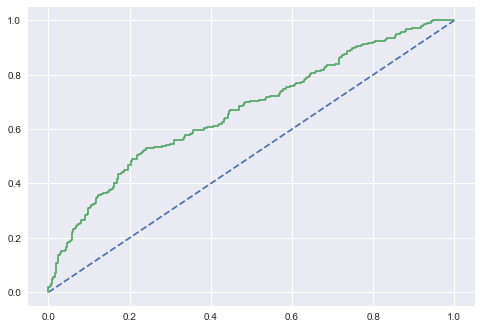

In [121]:
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(Y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(Y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [122]:
# Accuracy - Test Data
model.score(X_test, Y_test)

0.6297709923664122

### AUC and ROC for the test data

AUC: 0.667


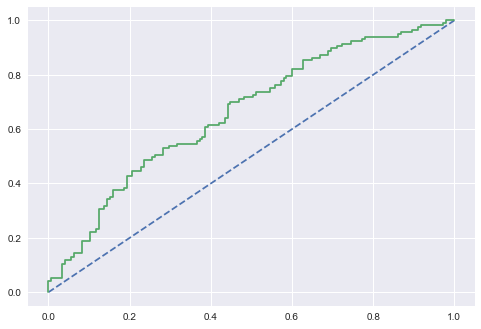

In [123]:
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(Y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(Y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

### Confusion Matrix for the training data

In [124]:
confusion_matrix(Y_train, ytrain_predict)

array([[265,  61],
       [158, 126]], dtype=int64)

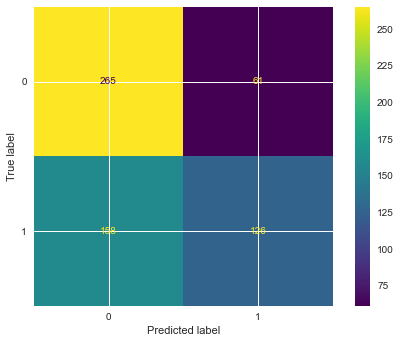

In [125]:
plot_confusion_matrix(model,X_train,Y_train);

In [126]:
print(classification_report(Y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.63      0.81      0.71       326
           1       0.67      0.44      0.54       284

    accuracy                           0.64       610
   macro avg       0.65      0.63      0.62       610
weighted avg       0.65      0.64      0.63       610



### Confusion Matrix for test data

In [127]:
confusion_matrix(Y_test, ytest_predict)

array([[113,  32],
       [ 65,  52]], dtype=int64)

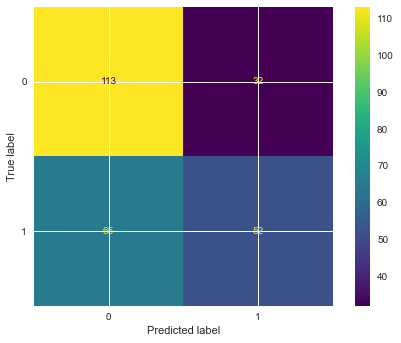

In [128]:
plot_confusion_matrix(model,X_test,Y_test);

In [129]:
print(classification_report(Y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.63      0.78      0.70       145
           1       0.62      0.44      0.52       117

    accuracy                           0.63       262
   macro avg       0.63      0.61      0.61       262
weighted avg       0.63      0.63      0.62       262



### Applying Grid Search CV in Logistics Regression

In [130]:
grid={'penalty':['l2','none'],
      'solver':['sag','lbfgs'],
      'tol':[0.0001,0.00001]}

In [131]:
model = LogisticRegression(max_iter=10000,n_jobs=2)

In [132]:
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')

In [133]:
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=10000, n_jobs=2),
             n_jobs=-1,
             param_grid={'penalty': ['l2', 'none'], 'solver': ['sag', 'lbfgs'],
                         'tol': [0.0001, 1e-05]},
             scoring='f1')

In [134]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'penalty': 'l2', 'solver': 'sag', 'tol': 0.0001} 

LogisticRegression(max_iter=10000, n_jobs=2, solver='sag')


In [135]:
best_model = grid_search.best_estimator_

In [136]:

ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)

In [137]:
ytest_predict_prob=best_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

0         1
0  0.591059  0.408941
1  0.540421  0.459579
2  0.548785  0.451215
3  0.598271  0.401729
4  0.530047  0.469953

              precision    recall  f1-score   support

           0       0.53      1.00      0.70       326
           1       0.00      0.00      0.00       284

    accuracy                           0.53       610
   macro avg       0.27      0.50      0.35       610
weighted avg       0.29      0.53      0.37       610
 



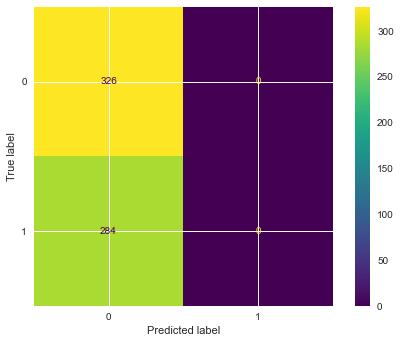

In [140]:
plot_confusion_matrix(best_model,X_train,Y_train)
print(classification_report(Y_train, ytrain_predict),'\n');

              precision    recall  f1-score   support

           0       0.55      1.00      0.71       145
           1       0.00      0.00      0.00       117

    accuracy                           0.55       262
   macro avg       0.28      0.50      0.36       262
weighted avg       0.31      0.55      0.39       262
 



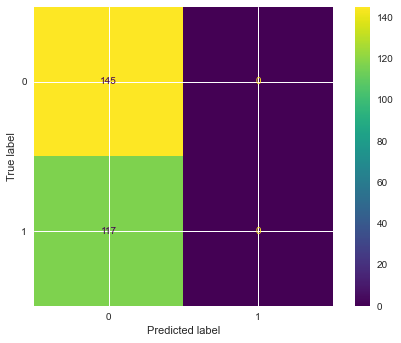

In [142]:
plot_confusion_matrix(best_model,X_test,Y_test)
print(classification_report(Y_test, ytest_predict),'\n');